<a href="https://colab.research.google.com/github/Pilestin/MachineLearning/blob/main/3-MachineLearning3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd 
import numpy as np 
import seaborn as sb 
import matplotlib.pyplot as plt 
import xgboost as xgb           # Boosting için kullanılacak kütüphane

from sklearn import datasets

irisHastalik = datasets.load_iris() # iris hastalığı dataset'ini aldık



In [ ]:
x = irisHastalik.data 
x

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [ ]:
y = irisHastalik.target
y


150

In [ ]:
from sklearn.model_selection import train_test_split
xTrain , xTest , yTrain , yTest = train_test_split(x,y,test_size=0.2,random_state=42)


In [ ]:
xTrain.shape

(120, 4)

In [ ]:
xTest.shape

(30, 4)

In [ ]:
dtrain = xgb.DMatrix(xTrain,label=yTrain)
dtest = xgb.DMatrix(xTest, label=yTest)
params = {'max_depth' : 3 , 'eta' : 0.3 , 'silent' : 1 , 'num_class' : 3}
num_round = 20 


In [ ]:
bst = xgb.train(params, dtrain, num_boost_round=num_round) 
preds = bst.predict(dtest)
preds[:10]

array([1., 0., 2., 1., 1., 0., 1., 2., 1., 1.], dtype=float32)

In [ ]:
from sklearn.metrics import precision_score 
precision_score(yTest, preds, average='macro')   # çok multiclass olduğu zaman seçilen parametreler - macro - micro - . . . 


1.0

Datamız uyumlu olduğu için 1 geldi.


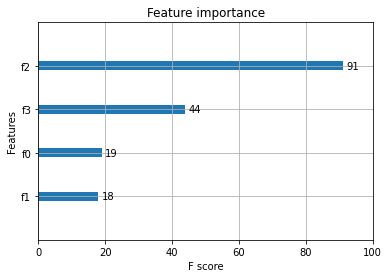

In [ ]:
xgb.plot_importance(bst)